<a href="https://colab.research.google.com/github/dewi31/brain_stroke_prediction/blob/main/Proyek_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brain Stroke Prediction - Dewi Wahidatul Karimah

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Loading**

In [ ]:
# Membaca/memuat file CSV
df = pd.read_csv('/content/full_data.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# **Data Understanding**

In [ ]:
df.shape

(4981, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# Menghitung data yang bernilai kosong(NAN, NaN, na)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Karena tidak ada data yang bernilai kosong maka data tidak ada yang dihapus

**Univariate Analysis**

In [ ]:
# Mendapatkan deskriptif statistik dari data kontinu
df[['age', 'avg_glucose_level',	'bmi']].describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


#### Analisis data kontinu dari dataset

In [ ]:
# Melihat kategori yang ada pada data kategorikal
df.groupby('gender')['gender'].agg('count')

gender
Female    2907
Male      2074
Name: gender, dtype: int64

In [ ]:
df.groupby('hypertension')['hypertension'].agg('count')

hypertension
0    4502
1     479
Name: hypertension, dtype: int64

In [ ]:
df.groupby('heart_disease')['heart_disease'].agg('count')

heart_disease
0    4706
1     275
Name: heart_disease, dtype: int64

In [ ]:
df.groupby('ever_married')['ever_married'].agg('count')

ever_married
No     1701
Yes    3280
Name: ever_married, dtype: int64

In [ ]:
df.groupby('work_type')['work_type'].agg('count')

work_type
Govt_job          644
Private          2860
Self-employed     804
children          673
Name: work_type, dtype: int64

In [ ]:
df.groupby('Residence_type')['Residence_type'].agg('count')

Residence_type
Rural    2449
Urban    2532
Name: Residence_type, dtype: int64

In [ ]:
df.groupby('smoking_status')['smoking_status'].agg('count')

smoking_status
Unknown            1500
formerly smoked     867
never smoked       1838
smokes              776
Name: smoking_status, dtype: int64

In [ ]:
df.groupby('stroke')['stroke'].agg('count')

stroke
0    4733
1     248
Name: stroke, dtype: int64

# **Data Preparation**

**One Hot Encoding**

In [ ]:
df = pd.get_dummies(data =  df, columns = ['smoking_status'])
df = pd.get_dummies(data =  df, columns = ['Residence_type'])
df = pd.get_dummies(data =  df, columns = ['ever_married'])
df = pd.get_dummies(data =  df, columns = ['work_type'])
df = pd.get_dummies(data =  df, columns = ['gender'])
df = pd.get_dummies(data =  df, columns = ['heart_disease'])
df = pd.get_dummies(data =  df, columns = ['hypertension'])

In [ ]:
df

,age,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,...,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,heart_disease_0,heart_disease_1,hypertension_0,hypertension_1
0,67.0,228.69,36.6,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
1,80.0,105.92,32.5,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,49.0,171.23,34.4,1,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
3,79.0,174.12,24.0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,1
4,81.0,186.21,29.0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,70.15,29.8,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
4977,40.0,191.15,31.1,0,0,0,0,1,0,1,...,0,1,0,0,0,1,1,0,1,0
4978,45.0,95.02,31.8,0,0,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1
4979,40.0,83.94,30.0,0,0,0,0,1,1,0,...,0,1,0,0,0,1,1,0,1,0


**SMOTE**

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X = df.drop(["stroke"],axis =1)
y = df["stroke"]
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 4733, 1: 248})
Counter({1: 4733, 0: 4733})


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
# X = df.drop(["stroke"],axis =1)
# y = df["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

print(f'Total keseluruhan sampel dataset: {len(X)}')
print(f'Total keseluruhan data latih: {len(X_train)}')
print(f'Total keseluruhan data uji: {len(X_test)}')

Total keseluruhan sampel dataset: 9466
Total keseluruhan data latih: 7572
Total keseluruhan data uji: 1894


**Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data latih
continuous_data = ['age', 'avg_glucose_level',	'bmi']
scaler = StandardScaler()
scaler.fit(X_train[continuous_data])
X_train[continuous_data] = scaler.transform(X_train.loc[:, continuous_data])
X_train[continuous_data].head()

,age,avg_glucose_level,bmi
6555,0.117369,-1.051772,-0.185715
5653,1.079743,1.743685,-0.177495
4324,-0.049474,-0.657114,-0.325906
3423,1.034864,-0.298824,-0.859133
3204,-0.591643,-0.689405,-0.292579


In [ ]:
# Normalisasi data uji
X_test.loc[:, continuous_data] = scaler.transform(X_test[continuous_data])

# **Modelling**

**Grid Search**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import GridSearchCV

def model_nn(neurons, optimizer):
    model = Sequential()
    model.add(Dense(neurons, input_dim=21, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# Mendefinisikan parameter
param_grid = {'neurons': [8, 16, 24, 32],
              'optimizer': ['SGD', 'RMSprop', 'Adam']}
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=model_nn, epochs=10)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)

grid_result = grid.fit(X, y)

Epoch 1/10


<ipython-input-104-d43b6792a863>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=model_nn, epochs=10)


198/198 [==============================] - 1s 2ms/step - loss: 0.6714 - accuracy: 0.7815
Epoch 2/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8098
Epoch 3/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8151
Epoch 4/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8220
Epoch 5/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8197
Epoch 6/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8235
Epoch 7/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8220
Epoch 8/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8288
Epoch 9/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8271
Epoch 10/10
99/99 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7034
Epoch 1/10
1

In [ ]:
# summarize results
print("Nilai akurasi terbaik: %f menggunakan %s" % (grid_result.best_score_,
                                         grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) dengan: %r" % (mean, stdev, param))

Nilai akurasi terbaik: 0.934928 menggunakan {'neurons': 24, 'optimizer': 'RMSprop'}
0.527026 (0.276493) dengan: {'neurons': 8, 'optimizer': 'SGD'}
0.925629 (0.004763) dengan: {'neurons': 8, 'optimizer': 'RMSprop'}
0.881055 (0.044742) dengan: {'neurons': 8, 'optimizer': 'Adam'}
0.446963 (0.194641) dengan: {'neurons': 16, 'optimizer': 'SGD'}
0.873235 (0.034534) dengan: {'neurons': 16, 'optimizer': 'RMSprop'}
0.925001 (0.039318) dengan: {'neurons': 16, 'optimizer': 'Adam'}
0.547828 (0.262144) dengan: {'neurons': 24, 'optimizer': 'SGD'}
0.934928 (0.034814) dengan: {'neurons': 24, 'optimizer': 'RMSprop'}
0.885801 (0.035904) dengan: {'neurons': 24, 'optimizer': 'Adam'}
0.508364 (0.162835) dengan: {'neurons': 32, 'optimizer': 'SGD'}
0.827392 (0.096671) dengan: {'neurons': 32, 'optimizer': 'RMSprop'}
0.922570 (0.034315) dengan: {'neurons': 32, 'optimizer': 'Adam'}


**Model dengan Parameter Terbaik**

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=21, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
model.summary()

Model: "sequential_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_306 (Dense)           (None, 24)                528       
                                                                 
 dense_307 (Dense)           (None, 1)                 25        
                                                                 
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
237/237 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.8283 - val_loss: 0.3420 - val_accuracy: 0.8606
Epoch 2/10
237/237 [==============================] - 1s 3ms/step - loss: 0.2734 - accuracy: 0.8921 - val_loss: 0.2631 - val_accuracy: 0.8986
Epoch 3/10
237/237 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.9194 - val_loss: 0.2207 - val_accuracy: 0.9145
Epoch 4/10
237/237 [==============================] - 1s 3ms/step - loss: 0.1833 - accuracy: 0.9349 - val_loss: 0.1903 - val_accuracy: 0.9271
Epoch 5/10
237/237 [==============================] - 1s 3ms/step - loss: 0.1599 - accuracy: 0.9482 - val_loss: 0.1693 - val_accuracy: 0.9409
Epoch 6/10
237/237 [==============================] - 1s 3ms/step - loss: 0.1440 - accuracy: 0.9548 - val_loss: 0.1555 - val_accuracy: 0.9467
Epoch 7/10
237/237 [==============================] - 1s 2ms/step - loss: 0.1333 - accuracy: 0.9588 - val_loss: 0.1469 - val_accuracy: 0.9509
Epoch 

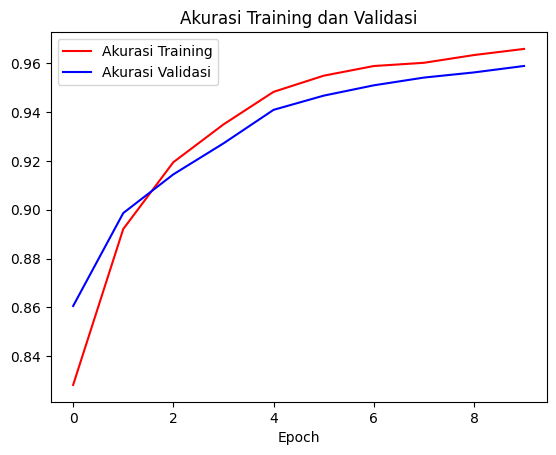

<Figure size 640x480 with 0 Axes>

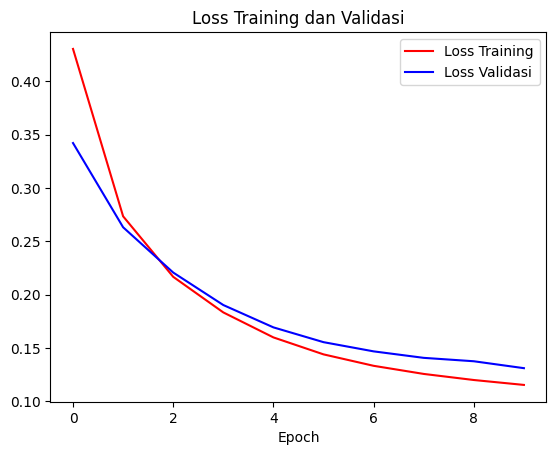

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
loss, acc = model.evaluate(X_train, y_train, verbose=2)
loss1, acc1 = model.evaluate(X_test, y_test, verbose=2)
print(" ")
print('akurasi model terhadap data latih: {:5.2f}'.format(acc))
print('akurasi model terhadap data uji: {:5.2f}'.format(acc1))
print('nilai loss model terhadap data latih: {:5.2f}'.format(loss))
print('nilai loss model terhadap data uji: {:5.2f}'.format(loss1))

237/237 - 0s - loss: 0.1116 - accuracy: 0.9674 - 288ms/epoch - 1ms/step
60/60 - 0s - loss: 0.1311 - accuracy: 0.9588 - 93ms/epoch - 2ms/step
 
akurasi model terhadap data latih:  0.97
akurasi model terhadap data uji:  0.96
nilai loss model terhadap data latih:  0.11
nilai loss model terhadap data uji:  0.13


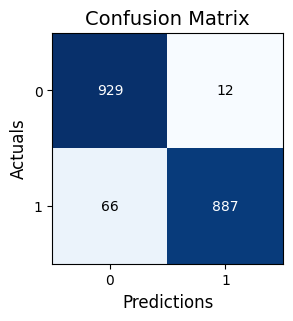


Presisi model sebesar 0.99
Recall model sebesar 0.93
F1_score model sebesar 0.96


In [ ]:
# presisi, recall, dan f1_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_test1 = model.predict(X_test, verbose=0)
cm = confusion_matrix(y_test,(y_test1 > 0.5))
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

Presisi = (TP) / (TP+FP)
Recall = (TP) / (TP + FN)
F1_Score = 2 * (Recall*Presisi) / (Recall + Presisi)
print('\nPresisi model sebesar %.2f' %Presisi)
print('Recall model sebesar %.2f' %Recall)
print('F1_score model sebesar %.2f' %F1_Score)